In [86]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import glob
from google.colab import drive
seed = 7
np.random.seed(seed)
drive.mount("/content/drive/")
path = "/content/drive/My Drive/Colab Notebooks/NNDL/HW2/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [87]:
df = pd.read_csv(path + "sonar.csv",header=None)
pd.value_counts(df[60])

M    111
R     97
Name: 60, dtype: int64

In [ ]:
pd.DataFrame(df.loc[93:100,50:60])

,50,51,52,53,54,55,56,57,58,59,60
93,0.0121,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,R
94,0.0108,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R
95,0.0000,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R
96,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085,R
97,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
98,0.0156,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M
99,0.0081,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
100,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M


In [88]:
X = df.iloc[:,0:60].values.astype(float)
y = df.iloc[:,60].values
print(X.shape)
print(y.shape)

(208, 60)
(208,)


In [89]:
X = StandardScaler().fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(42, 60)
(166, 60)
(42,)
(166,)


In [91]:
def TwoLayerModel():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy' , "mse"])
  return model

def tanh1_TwoLayerModel():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='tanh'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

def tanh2_TwoLayerModel():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(30, activation='tanh'))
  model.add(Dense(1, activation='tanh'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

def ThreeLayerModel():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

def FourLayerModel():
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(45, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

def SmallModel():
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(60,)))
  model.add(Dense(15, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [92]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
X_train.shape

(166, 60)

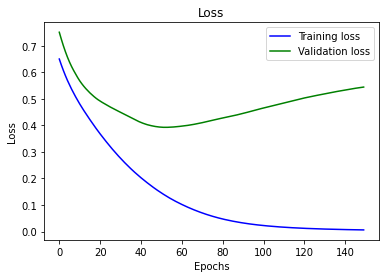

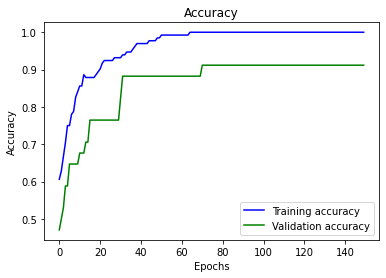

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 85.71%


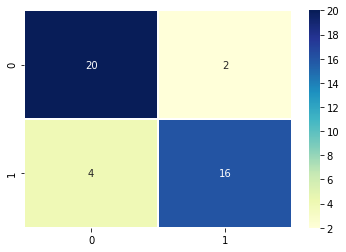

Cross Validation Accuracy: 87.90% ± 6.73%


In [ ]:
epochs=150
clf_batch = KerasClassifier(build_fn=TwoLayerModel, epochs=epochs)
history_batch = clf_batch.fit(X_train,y_train,validation_split=0.2,batch_size=166 , verbose=0)

## Loss
plt.figure(1)
plt.plot(range(epochs), history_batch.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), history_batch.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Accuracy
plt.figure(2)
plt.plot(range(epochs), history_batch.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), history_batch.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(3)
y_pred_batch = clf_batch.predict(X_test)
acc_batch = accuracy_score(y_test, y_pred_batch)
sns.heatmap(confusion_matrix(y_test, y_pred_batch), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
print("Accuracy: %.2f%%" % (acc_batch*100))
plt.show()

results = cross_val_score( KerasClassifier(build_fn=ThreeLayerModel, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

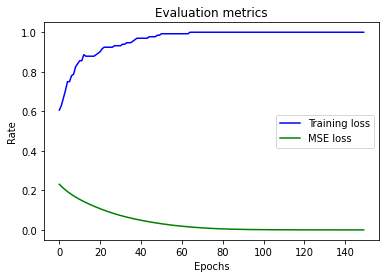

In [ ]:
plt.figure(1)
plt.plot(range(epochs), history_batch.history["accuracy"], 'b', label='Training loss')
plt.plot(range(epochs), history_batch.history["mse"], 'g', label='MSE loss')
plt.title('Evaluation metrics')
plt.xlabel('Epochs')
plt.ylabel('Rate')
plt.legend()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


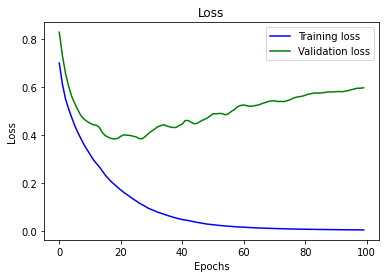

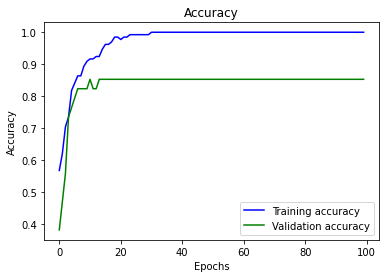

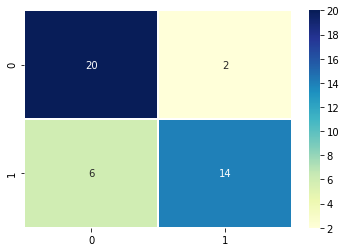

Accuracy: 80.95%


In [ ]:
epochs=100
clf_32 = KerasClassifier(build_fn=TwoLayerModel, epochs=epochs)
hist_32 = clf_32.fit(X_train,y_train,validation_split=0.2,batch_size=32,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_32.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_32.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_32.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_32.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
y_pred_32 = clf_32.predict(X_test)
acc_32 = accuracy_score(y_test, y_pred_32)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_32), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_32*100))
results = cross_val_score( KerasClassifier(build_fn=TwoLayerModel, epochs=150, batch_size=32, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


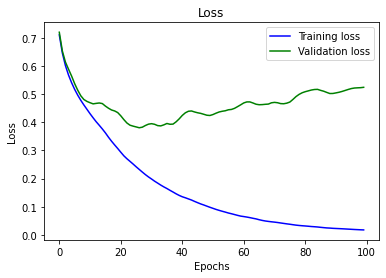

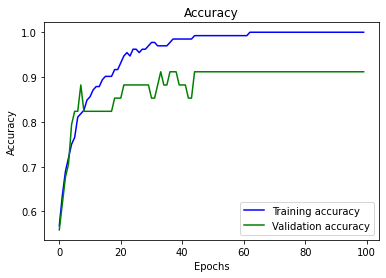

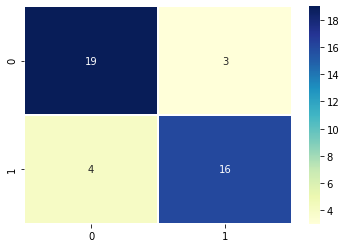

Accuracy: 83.33%
Cross Validation Accuracy: 84.62% ± 5.97%


In [ ]:
epochs=100
clf_64 = KerasClassifier(build_fn=TwoLayerModel, epochs=epochs)
hist_64 = clf_64.fit(X_train,y_train,validation_split=0.2,batch_size=64,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_64.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_64.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_64.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_64.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_64 = clf_64.predict(X_test)
acc_64 = accuracy_score(y_test, y_pred_64)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_64), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_64*100))
results = cross_val_score( KerasClassifier(build_fn=TwoLayerModel, epochs=150, batch_size=64, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


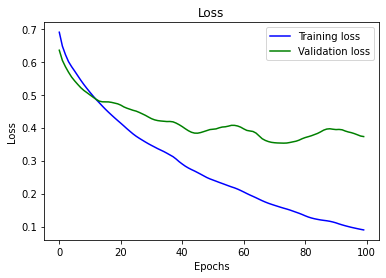

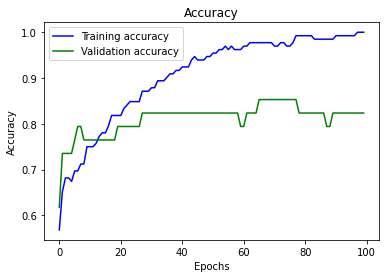

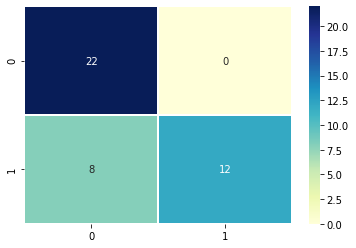

Accuracy: 80.95%
Cross Validation Accuracy: 87.00% ± 7.24%


In [ ]:
epochs = 100
clf_128 = KerasClassifier(build_fn=TwoLayerModel, epochs=epochs)
hist_128 = clf_128.fit(X_train,y_train,validation_split=0.2,batch_size=128,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_128.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_128.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_128.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_128.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_128 = clf_128.predict(X_test)
acc_128 = accuracy_score(y_test, y_pred_128)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_128), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()

print("Accuracy: %.2f%%" % (acc_128*100))
results = cross_val_score( KerasClassifier(build_fn=TwoLayerModel, epochs=150, batch_size=128, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


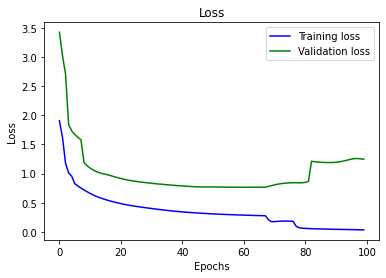

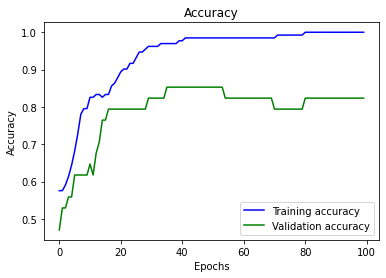

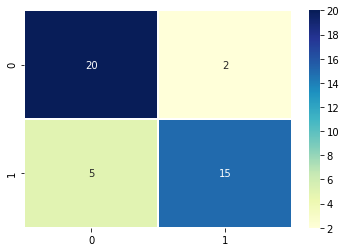

Accuracy: 83.33%
Cross Validation Accuracy: 80.70% ± 7.53%


In [ ]:
epochs=100
clf_tanh1 = KerasClassifier(build_fn=tanh1_TwoLayerModel, epochs=epochs)
hist_tanh1 = clf_tanh1.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_tanh1.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_tanh1.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_tanh1.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_tanh1.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_tanh1 = clf_tanh1.predict(X_test)
acc_tanh1 = accuracy_score(y_test, y_pred_tanh1)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_tanh1), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_tanh1*100))

results = cross_val_score( KerasClassifier(build_fn=tanh1_TwoLayerModel, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


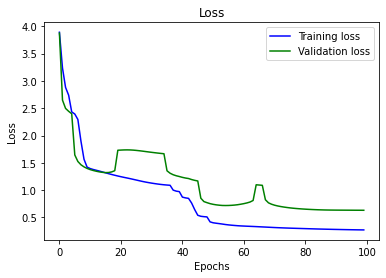

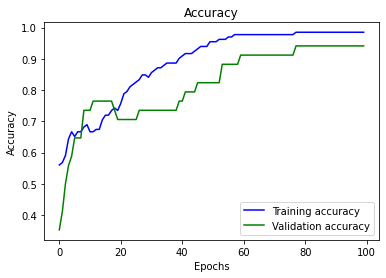

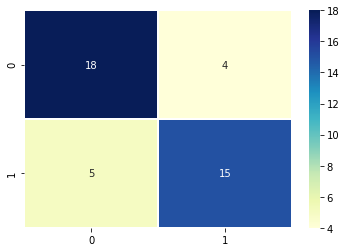

Accuracy: 78.57%
Cross Validation Accuracy: 78.75% ± 9.91%


In [ ]:
clf_tanh2 = KerasClassifier(build_fn=tanh2_TwoLayerModel, epochs=epochs)
hist_tanh2 = clf_tanh2.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_tanh2.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_tanh2.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_tanh2.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_tanh2.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_tanh2 = clf_tanh2.predict(X_test)
acc_tanh2 = accuracy_score(y_test, y_pred_tanh2)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_tanh2), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_tanh2*100))

results = cross_val_score( KerasClassifier(build_fn=tanh2_TwoLayerModel, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


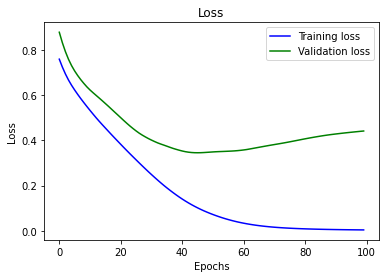

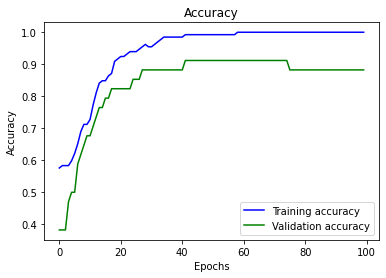

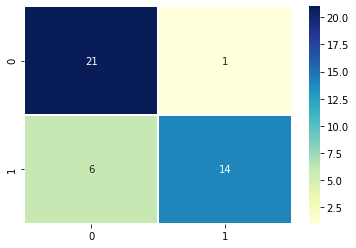

Accuracy: 83.33%


In [ ]:
epochs=100
clf_3Layer = KerasClassifier(build_fn=ThreeLayerModel, epochs=epochs)
hist_3Layer = clf_3Layer.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_3Layer.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_3Layer.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_3Layer.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_3Layer.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_3Layer = clf_3Layer.predict(X_test)
acc_3Layer = accuracy_score(y_test, y_pred_3Layer)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_3Layer), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_3Layer*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


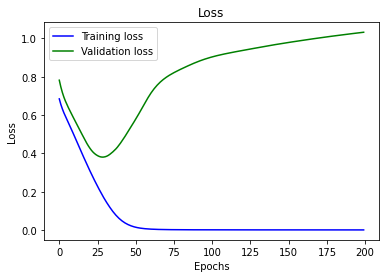

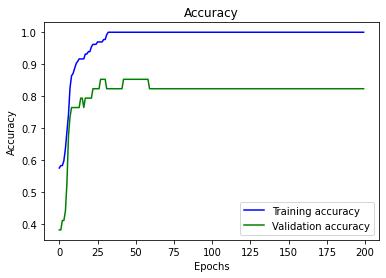

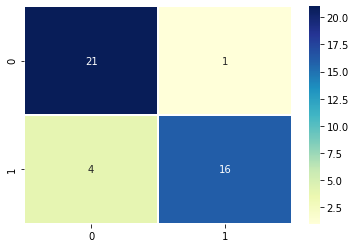

Accuracy: 88.10%


In [ ]:
epochs = 200
clf_4Layer = KerasClassifier(build_fn=FourLayerModel, epochs=epochs)
hist_4Layer = clf_4Layer.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_4Layer.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_4Layer.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_4Layer.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_4Layer.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_4Layer = clf_4Layer.predict(X_test)
acc_4Layer = accuracy_score(y_test, y_pred_4Layer)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_4Layer), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_4Layer*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


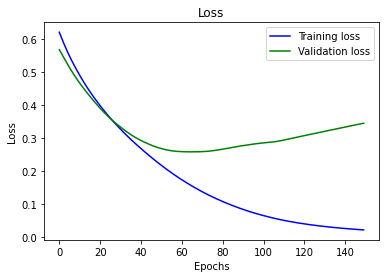

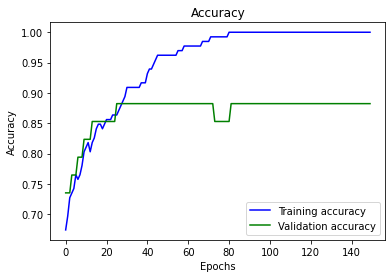

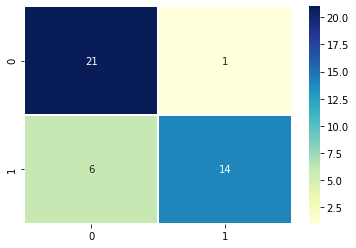

Accuracy: 83.33%


In [ ]:
epochs=150
clf_small = KerasClassifier(build_fn=SmallModel, epochs=epochs)
hist_small = clf_small.fit(X_train,y_train,validation_split=0.2,batch_size=166,verbose=0)

plt.figure(1)
plt.plot(range(epochs), hist_small.history["loss"], 'b', label='Training loss')
plt.plot(range(epochs), hist_small.history["val_loss"], 'g', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
plt.plot(range(epochs), hist_small.history["accuracy"], 'b', label='Training accuracy')
plt.plot(range(epochs), hist_small.history["val_accuracy"], 'g', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

y_pred_small = clf_small.predict(X_test)
acc_small = accuracy_score(y_test, y_pred_small)
plt.figure(3)
sns.heatmap(confusion_matrix(y_test, y_pred_small), annot=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.show()
print("Accuracy: %.2f%%" % (acc_small*100))
results = cross_val_score( KerasClassifier(build_fn=SmallModel, epochs=150, batch_size=166, verbose=0), X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %.2f%% ± %.2f%%" % (results.mean()*100, results.std()*100))